In [38]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [39]:
#Load data

df=pd.read_csv("C:/Users/Dell/Desktop/datasets/company.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [40]:
s=['R&D Spend','Administration','Marketing Spend']
X=df[s]
Y=df.Profit

In [41]:
print(X.shape)
print(Y.shape)

(1000, 3)
(1000,)


In [42]:
#Convert  X and Y into numpy arrays
X=np.array(X)
Y=np.array(Y)

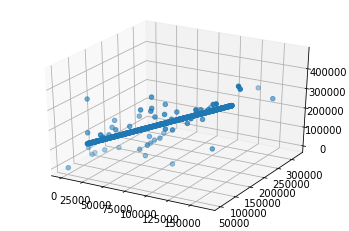

In [43]:
#let's plot the data to see the data looks like
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], Y)
plt.show()

In [44]:
np.dot(X.T,X)

array([[8.83339315e+12, 1.03838889e+13, 2.26395627e+13],
       [1.03838889e+13, 1.52790722e+13, 2.84156763e+13],
       [2.26395627e+13, 2.84156763e+13, 5.95469440e+13]])

In [45]:
np.dot(X.T,Y)

array([1.16479664e+13, 1.51006409e+13, 3.06410810e+13])

In [46]:
#calculate weights
w=np.linalg.solve(np.dot(X.T, X), np.dot(X.T, Y))
print(w)

[ 0.93307894  0.50626724 -0.0817732 ]


In [47]:
#predicted values
Yhat=np.dot(X,w)
Yhat

array([185011.43139619, 192055.00041599, 161021.60659628, 163455.06557435,
       148923.26134069, 143912.14071556, 189685.00353821, 168771.11001224,
       162285.60298658, 145162.55917007, 132343.89911503, 119983.05318527,
       131610.25504374, 133771.6568372 , 170195.45908312, 147530.17756229,
       112736.82251351, 138663.62273235, 119296.15370237, 158355.56737474,
       104375.40473697, 126483.53593373, 106400.26268918,  91629.54885016,
       110655.78111326, 119706.8273936 , 132297.40390458, 103134.74497273,
       144437.38971628, 129929.16243228, 108939.04238151, 127139.16152887,
       120816.58913424,  86403.49160712, 105916.85373821,  69185.61039394,
        74623.16373973,  50971.98948443,  37113.36054172,  63678.99436867,
        72715.98633056,  55463.28752553,  58653.98793968,  76051.81305036,
        96749.8390246 ,  63632.22034339,  35565.38038624,  68562.2133912 ,
        26701.63732507,  55531.12009025, 124380.55708887,  83255.25394009,
       126750.53878022, 1

In [48]:
import pandas as pd
compare=pd.DataFrame({'Actual values':Y, 'Predicted values':Yhat})
print(compare.head())

   Actual values  Predicted values
0      192261.83     185011.431396
1      191792.06     192055.000416
2      191050.39     161021.606596
3      182901.99     163455.065574
4      166187.94     148923.261341


In [49]:
#mean square error
error = abs(Yhat-Y)
print(error)

[  7250.39860381    262.94041599  30028.78340372  19446.92442565
  17264.67865931  13078.97928444  33562.49353821  13018.51001224
  10073.83298658   4597.40082993  13778.05088497  24276.34681473
   9975.26495626    535.6931628   37592.80908312  17613.13756229
  14256.10748649  13293.25273235   4970.74629763  35578.70737474
  14098.62526303  15170.51593373   3951.98731082  17104.44114984
   2103.74111326  12302.4873936   26563.86390458   1873.56502727
  41155.00971628  28924.52243228   9001.45238151  29655.60152887
  23388.74913424  10375.42839288   9204.05373821  27293.89960606
  16085.02626027  38977.15051557  44115.69945828  17326.76563133
   5523.92366944  22335.54247447  12844.50206032   6292.83305036
  31549.5090246    1293.85965661  13925.36961376  26002.4833912
   8971.77267493  40849.72009025    895.31068887   1099.76976009
    883.52798022    986.87537659   1061.93684935   1133.69766876
    940.82682286    655.38112437   1148.33720413    667.34554718
    721.24635737    939.64

In [52]:
from sklearn.metrics import mean_squared_error
msc=mean_squared_error(Y,Yhat)
msc

121068325.72314234

In [50]:
#compute  r-squared
d1=Y-Yhat
d2=Y-Y.mean()
r2=1-d1.dot(d1)/d2.dot(d2)
print("r-squared:",r2)

r-squared: 0.9341158992056325


In [51]:
from sklearn.metrics import r2_score
print("r2_score is:",r2_score(Y,Yhat))

r2_score is: 0.9341158992056325
